<a href="https://colab.research.google.com/github/ayushic2899/Tweet_Sentiment_Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/sentiment_TCS.csv")

In [ ]:
data.head()

,polarity,tweet,dates
0,0.000,RT sachinv1125 Plz PM Modi ji reschedule exam ...,04-03-2021
1,0.475,What a great time and great job by you Sean al...,04-03-2021
2,0.000,please continue wfh TCS,04-03-2021
3,0.500,While India Inc is jumping to cover vaccinatio...,04-03-2021
4,0.600,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,04-03-2021


In [ ]:
 data['polarity'].unique()

array([ 0.00000000e+00,  4.75000000e-01,  5.00000000e-01,  6.00000000e-01,
        2.00000000e-01, -5.00000000e-01,  4.50000000e-01, -1.00000000e-01,
        1.00000000e-01, -1.12500000e-01,  2.25000000e-01,  3.33333333e-01,
       -4.00000000e-01, -8.54166667e-02,  9.91161616e-02, -3.00000000e-01,
        1.36363636e-01,  6.66666667e-02,  1.00000000e+00, -1.66666667e-01,
        2.50000000e-01, -5.20000000e-01, -7.50000000e-01,  5.33333333e-01,
        8.00000000e-01, -7.50000000e-02, -6.00000000e-01,  2.66666667e-01,
        5.00000000e-02,  3.00000000e-01,  3.18181818e-01,  1.42857143e-01,
        7.00000000e-01, -8.33333333e-02,  1.50000000e-01,  1.58333333e-01,
       -5.00000000e-02,  1.80000000e-01, -1.87500000e-01, -4.04761905e-01,
        4.00000000e-01,  2.20000000e-01,  5.75000000e-01,  6.33333333e-01,
        6.00000000e-01,  2.54166667e-01,  3.87500000e-01,  1.57142857e-01,
       -2.91666667e-02,  1.81818182e-02,  2.75000000e-01, -1.07142857e-01,
        1.11111111e-02,  

In [ ]:
 data['dates'].unique()

array(['04-03-2021', '05-03-2021', '06-03-2021', '07-03-2021',
       '08-03-2021', '09-03-2021', '10-03-2021'], dtype=object)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
%matplotlib inline

In [ ]:
data.head()

,polarity,tweet,dates
0,0.000,RT sachinv1125 Plz PM Modi ji reschedule exam ...,04-03-2021
1,0.475,What a great time and great job by you Sean al...,04-03-2021
2,0.000,please continue wfh TCS,04-03-2021
3,0.500,While India Inc is jumping to cover vaccinatio...,04-03-2021
4,0.600,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,04-03-2021


In [ ]:
def getSentiment(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
data['Sentiment']=data['polarity'].apply(getSentiment)

In [ ]:
data.head()

,polarity,tweet,dates,Sentiment
0,0.000,RT sachinv1125 Plz PM Modi ji reschedule exam ...,04-03-2021,Neutral
1,0.475,What a great time and great job by you Sean al...,04-03-2021,Positive
2,0.000,please continue wfh TCS,04-03-2021,Neutral
3,0.500,While India Inc is jumping to cover vaccinatio...,04-03-2021,Positive
4,0.600,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,04-03-2021,Positive


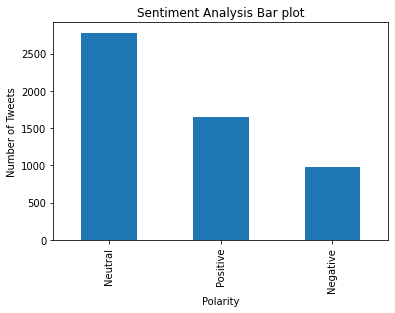

In [ ]:
#Create a bar chart to show the count of positive,Neutral,and negative sentiments
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar plot')
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
data['Sentiment'].value_counts()

Neutral     2778
Positive    1650
Negative     983
Name: Sentiment, dtype: int64

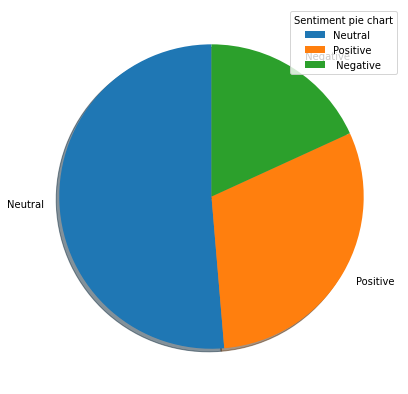

In [ ]:
#pie chart for Sentiments
import numpy as np
plt.figure(figsize=(7, 7))
y = np.array([2778,1650,983])
mylabel = ["Neutral","Positive"," Negative"]
plt.pie(y, labels = mylabel, startangle = 90,shadow = True)
plt.legend(title = "Sentiment pie chart")
plt.show() 

In [ ]:
df= data.drop(columns = ['tweet'])

In [ ]:
df.head()

,polarity,dates,Sentiment
0,0.000,04-03-2021,Neutral
1,0.475,04-03-2021,Positive
2,0.000,04-03-2021,Neutral
3,0.500,04-03-2021,Positive
4,0.600,04-03-2021,Positive


In [ ]:
df.groupby('dates').count()

,polarity,Sentiment
dates,,
04-03-2021,859,859
05-03-2021,859,859
06-03-2021,859,859
07-03-2021,861,861
08-03-2021,794,794
09-03-2021,661,661
10-03-2021,518,518


In [ ]:
## sentiment category values with respect to their dates
df2=pd.pivot_table(df,index=['dates'],columns=['Sentiment'],values=['Sentiment'],aggfunc='count')
df2

polarity                 
Sentiment  Negative Neutral Positive
dates                               
04-03-2021      159     426      274
05-03-2021      159     426      274
06-03-2021      159     426      274
07-03-2021      159     426      276
08-03-2021      139     408      247
09-03-2021      114     364      183
10-03-2021       94     302      122

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


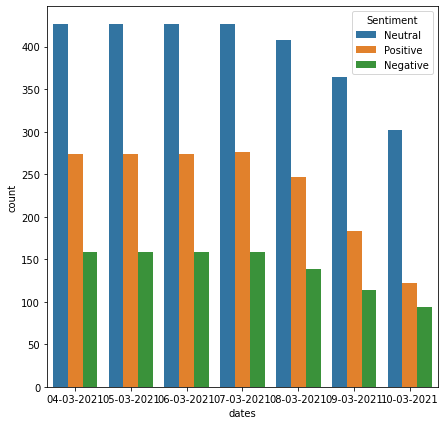

In [ ]:
#count plot between dates and Sentiments
plt.figure(figsize=(7, 7))
sns.countplot('dates',hue='Sentiment' ,data=df)


**Preprocessing** **the** **dataset**

In [ ]:
final= data.drop(columns = ['polarity','dates'])
final

,tweet,Sentiment
0,RT sachinv1125 Plz PM Modi ji reschedule exam ...,Neutral
1,What a great time and great job by you Sean al...,Positive
2,please continue wfh TCS,Neutral
3,While India Inc is jumping to cover vaccinatio...,Positive
4,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,Positive
...,...,...
5406,RT SecySanjay On IWD2021 Women from armed forc...,Positive
5407,TCS DGCAIndia eLogbook horrendous effort by DG...,Positive
5408,On IWD2021 Women from armed forces doctors tea...,Positive
5409,lumarid AnnickCharlot TCS StoupasTeresa ToddLa...,Positive


In [ ]:
dummies=pd.get_dummies(final.Sentiment)
dummies

,Negative,Neutral,Positive
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
5406,0,0,1
5407,0,0,1
5408,0,0,1
5409,0,0,1


In [ ]:
#Dummy Variables
merged= pd.concat([final,dummies],axis='columns')
merged

,tweet,Sentiment,Negative,Neutral,Positive
0,RT sachinv1125 Plz PM Modi ji reschedule exam ...,Neutral,0,1,0
1,What a great time and great job by you Sean al...,Positive,0,0,1
2,please continue wfh TCS,Neutral,0,1,0
3,While India Inc is jumping to cover vaccinatio...,Positive,0,0,1
4,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,Positive,0,0,1
...,...,...,...,...,...
5406,RT SecySanjay On IWD2021 Women from armed forc...,Positive,0,0,1
5407,TCS DGCAIndia eLogbook horrendous effort by DG...,Positive,0,0,1
5408,On IWD2021 Women from armed forces doctors tea...,Positive,0,0,1
5409,lumarid AnnickCharlot TCS StoupasTeresa ToddLa...,Positive,0,0,1


In [ ]:
#We can drop any one column
final = merged.drop(['Sentiment','Neutral'],axis='columns')
final

,tweet,Negative,Positive
0,RT sachinv1125 Plz PM Modi ji reschedule exam ...,0,0
1,What a great time and great job by you Sean al...,0,1
2,please continue wfh TCS,0,0
3,While India Inc is jumping to cover vaccinatio...,0,1
4,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,0,1
...,...,...,...
5406,RT SecySanjay On IWD2021 Women from armed forc...,0,1
5407,TCS DGCAIndia eLogbook horrendous effort by DG...,0,1
5408,On IWD2021 Women from armed forces doctors tea...,0,1
5409,lumarid AnnickCharlot TCS StoupasTeresa ToddLa...,0,1


In [ ]:
import re
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
# remove twitter handles (@user)
final['clean_tweet'] = np.vectorize(remove_pattern)(final['tweet'], "@[\w]*")

In [ ]:
# remove special characters, numbers and punctuations
final['clean_tweet'] = final['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
final.head()

,tweet,Negative,Positive,clean_tweet
0,RT sachinv1125 Plz PM Modi ji reschedule exam ...,0,0,RT sachinv Plz PM Modi ji reschedule exam ...
1,What a great time and great job by you Sean al...,0,1,What a great time and great job by you Sean al...
2,please continue wfh TCS,0,0,please continue wfh TCS
3,While India Inc is jumping to cover vaccinatio...,0,1,While India Inc is jumping to cover vaccinatio...
4,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,0,1,tpbhatla passportsevamea TCS VMBJP SecySanjay ...


In [ ]:
# remove short words
final['clean_tweet'] = final['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
final.head()

,tweet,Negative,Positive,clean_tweet
0,RT sachinv1125 Plz PM Modi ji reschedule exam ...,0,0,sachinv Modi reschedule exam date short notice...
1,What a great time and great job by you Sean al...,0,1,What great time great Sean always talk hockey ...
2,please continue wfh TCS,0,0,please continue
3,While India Inc is jumping to cover vaccinatio...,0,1,While India jumping cover vaccination cost emp...
4,tpbhatla passportsevamea TCS VMBJP SecySanjay ...,0,1,tpbhatla passportsevamea VMBJP SecySanjay DrSJ...


In [ ]:
# individual words considered as tokens
tokenized_tweet = final['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [sachinv, Modi, reschedule, exam, date, short,...
1    [What, great, time, great, Sean, always, talk,...
2                                   [please, continue]
3    [While, India, jumping, cover, vaccination, co...
4    [tpbhatla, passportsevamea, VMBJP, SecySanjay,...
Name: clean_tweet, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [sachinv, modi, reschedul, exam, date, short, ...
1    [what, great, time, great, sean, alway, talk, ...
2                                     [pleas, continu]
3    [while, india, jump, cover, vaccin, cost, empl...
4    [tpbhatla, passportsevamea, vmbjp, secysanjay,...
Name: clean_tweet, dtype: object

In [ ]:
#Dataset with clean Tweets
final= final.drop(columns = ['tweet'])
final.head()

,Negative,Positive,clean_tweet
0,0,0,sachinv Modi reschedule exam date short notice...
1,0,1,What great time great Sean always talk hockey ...
2,0,0,please continue
3,0,1,While India jumping cover vaccination cost emp...
4,0,1,tpbhatla passportsevamea VMBJP SecySanjay DrSJ...



**Exploratory** **Data** **Analysis**



In [ ]:
!pip install wordcloud

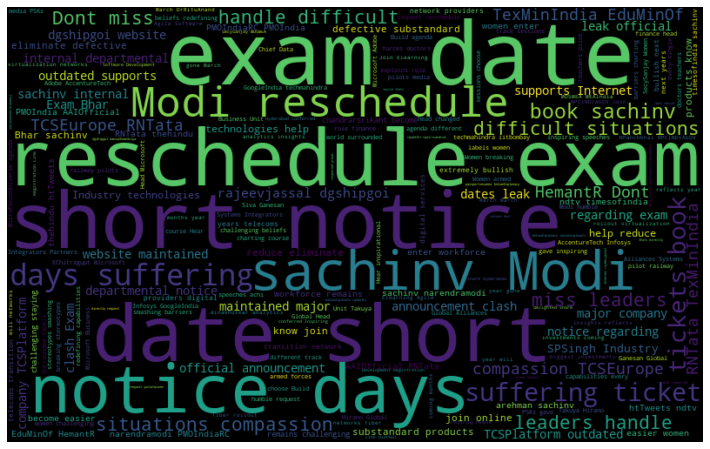

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in final['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()